In [ ]:
# Install required packages
!pip install selenium
!apt-get update
!apt-get install -y chromium-chromedriver

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.3/448.3 kB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InR

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

# List of stock symbols
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','^IXIC']

# Function to retrieve historical monthly data for a given stock
def get_stock_data(stock_symbol):
    # Set the start and end dates for the historical data
    start_date = datetime.now() - timedelta(days=365 * 50)  # 50 years ago from today
    end_date = datetime.now()

    # Download historical data using yfinance
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date, interval="1mo")

    return stock_data

# Create a dictionary to store data for each stock
stock_data_dict = {}

# Iterate through the list of tickers and retrieve data
for ticker in tickers:
    stock_data = get_stock_data(ticker)
    stock_data_dict[ticker] = stock_data

# Save the data to CSV files
for ticker, data in stock_data_dict.items():
    data.to_csv(f'{ticker}_historical_data.csv')

print("Data extraction and saving completed.")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data extraction and saving completed.


In [ ]:
import pandas as pd

# List of stock symbols
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META','^IXIC']

# Create an empty dictionary to store DataFrames for each stock
dfs = {}

# Read CSV files and store in the dictionary
for ticker in tickers:
    file_path = f'{ticker}_historical_data.csv'
    df = pd.read_csv(file_path, parse_dates=True, index_col='Date')
    dfs[ticker] = df

# Display the first few rows of each DataFrame
for ticker, df in dfs.items():
    print(f"\n{ticker} DataFrame:")
    print(df.head())



AAPL DataFrame:
                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
1985-01-01  0.130022  0.138951  0.124442  0.129464   0.100182  6366416000
1985-02-01  0.129464  0.137277  0.110491  0.110491   0.085501  4733388800
1985-03-01  0.110491  0.116071  0.092634  0.098772   0.076432  4615587200
1985-04-01  0.098772  0.102679  0.087612  0.094866   0.073410  2868028800
1985-05-01  0.094866  0.099330  0.075335  0.077567   0.060023  4639129600

MSFT DataFrame:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1986-04-01  0.095486  0.121962  0.092882  0.111979   0.069423  547142400
1986-05-01  0.111979  0.123264  0.107639  0.121528   0.075343  333446400
1986-06-01  0.121528  0.121528  0.102431  0.106771   0.066194  293788800
1986-07-01  0.106771  0.109375  0.090278  0.098958   0.061350  460800000
1986-08-01

In [ ]:
dfs.keys()

dict_keys(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', '^IXIC'])

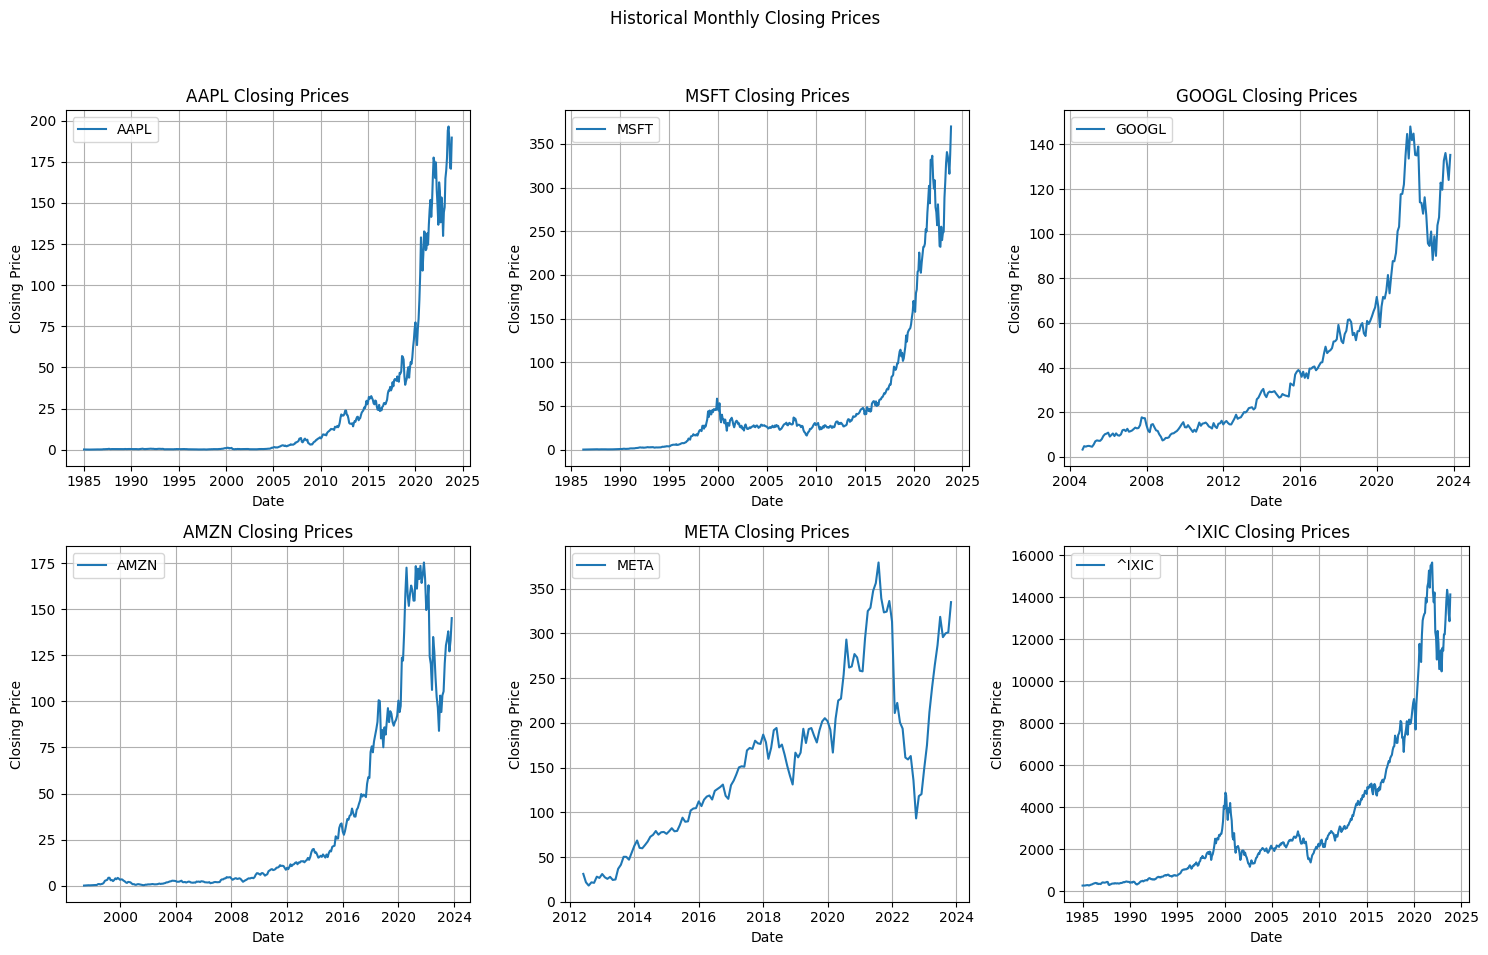

In [ ]:
import matplotlib.pyplot as plt

# Create a grid layout for subplots
num_rows = 2
num_cols = 3

# Iterate through the dictionary and plot line charts in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Historical Monthly Closing Prices')

# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

for i, (ticker, df) in enumerate(dfs.items()):
    axs[i].plot(df.index, df['Close'], label=ticker)
    axs[i].set_title(f'{ticker} Closing Prices')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


In [ ]:
#stationality test, rolling stats and ADCF test

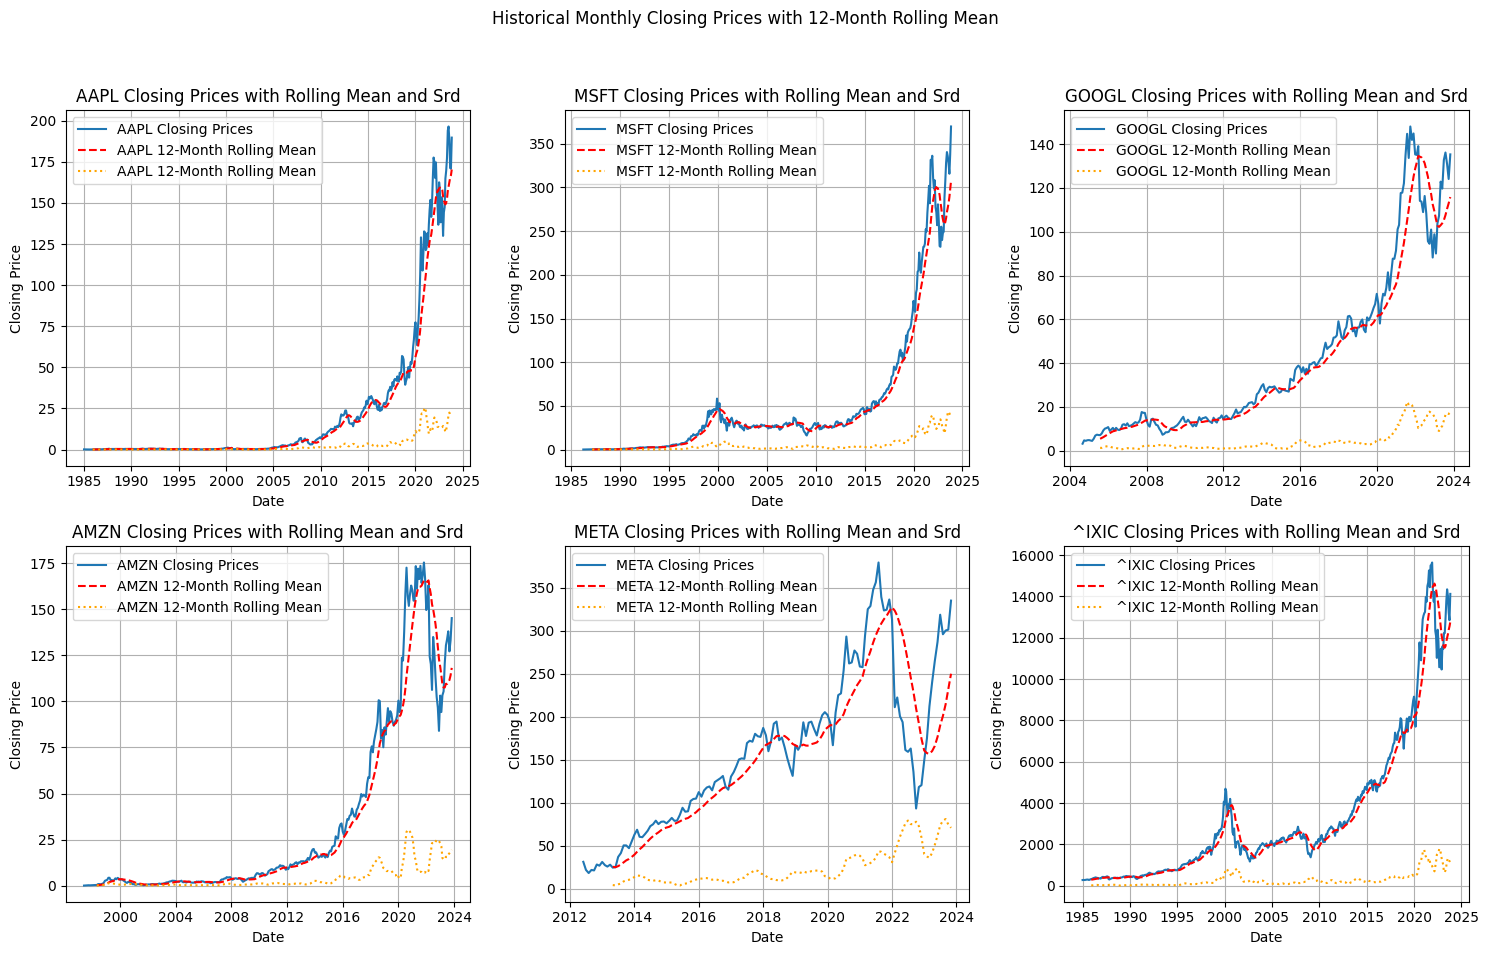

In [ ]:
import matplotlib.pyplot as plt

# Create a grid layout for subplots
num_rows = 2
num_cols = 3

# Iterate through the dictionary and plot line charts with rolling mean in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Historical Monthly Closing Prices with 12-Month Rolling Mean')

# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

for i, (ticker, df) in enumerate(dfs.items()):
    # Calculate 12-month rolling mean
    rolling_mean = df['Close'].rolling(window=12).mean()
    rolling_std = df['Close'].rolling(window=12).std()

    axs[i].plot(df.index, df['Close'], label=f'{ticker} Closing Prices')
    axs[i].plot(df.index, rolling_mean, label=f'{ticker} 12-Month Rolling Mean', color='red', linestyle='--')
    axs[i].plot(df.index, rolling_std, label=f'{ticker} 12-Month Rolling Mean', color='orange', linestyle=':')

    axs[i].set_title(f'{ticker} Closing Prices with Rolling Mean and Srd')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Closing Price')
    axs[i].legend()
    axs[i].grid(True)

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for the title
plt.show()


Correlation Matrix:
           AAPL      MSFT     GOOGL      AMZN      META     ^IXIC
AAPL   1.000000  0.985824  0.978873  0.932166  0.811373  0.951135
MSFT   0.985824  1.000000  0.980878  0.945947  0.868646  0.969897
GOOGL  0.978873  0.980878  1.000000  0.959548  0.897172  0.993472
AMZN   0.932166  0.945947  0.959548  1.000000  0.946850  0.977986
META   0.811373  0.868646  0.897172  0.946850  1.000000  0.935304
^IXIC  0.951135  0.969897  0.993472  0.977986  0.935304  1.000000


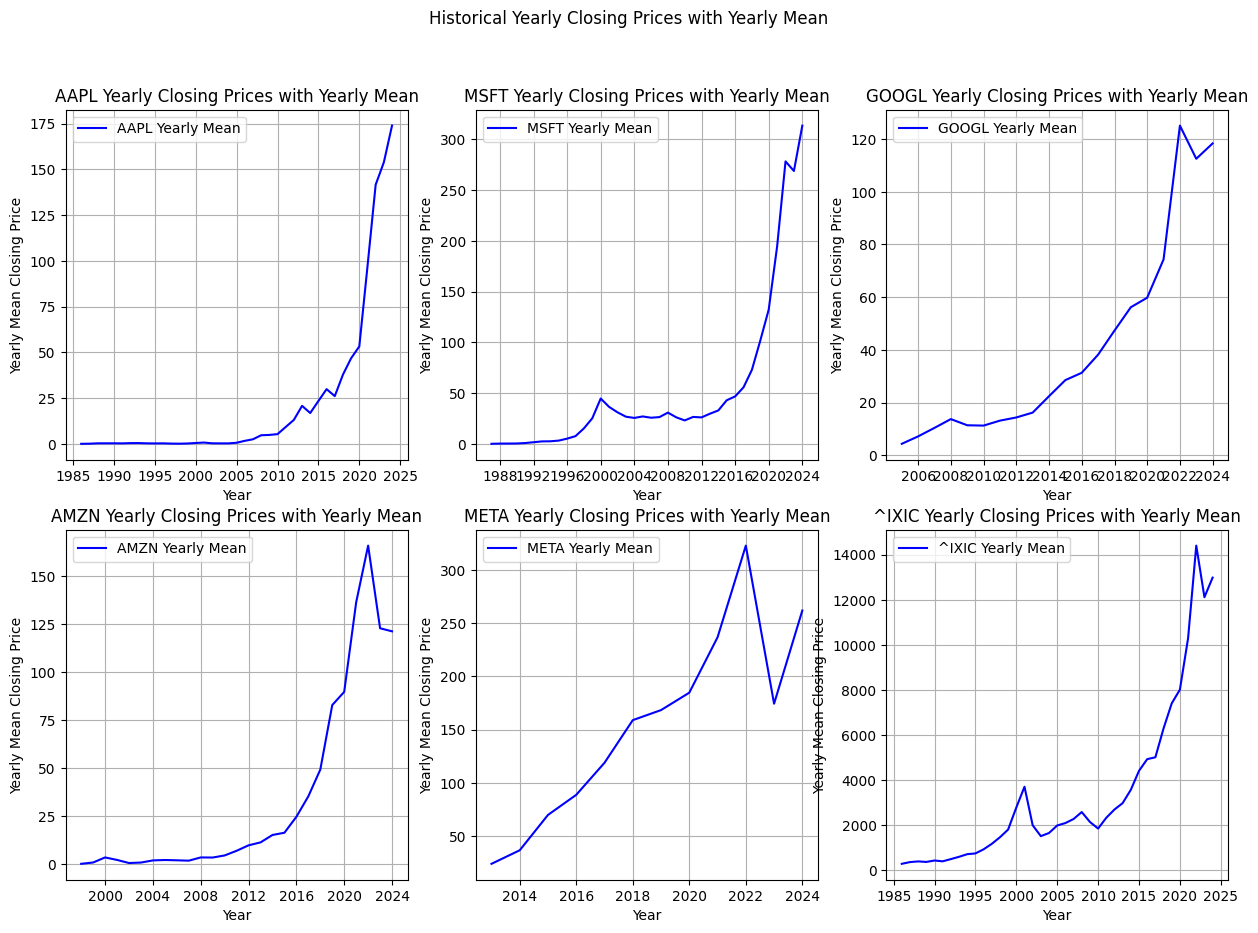

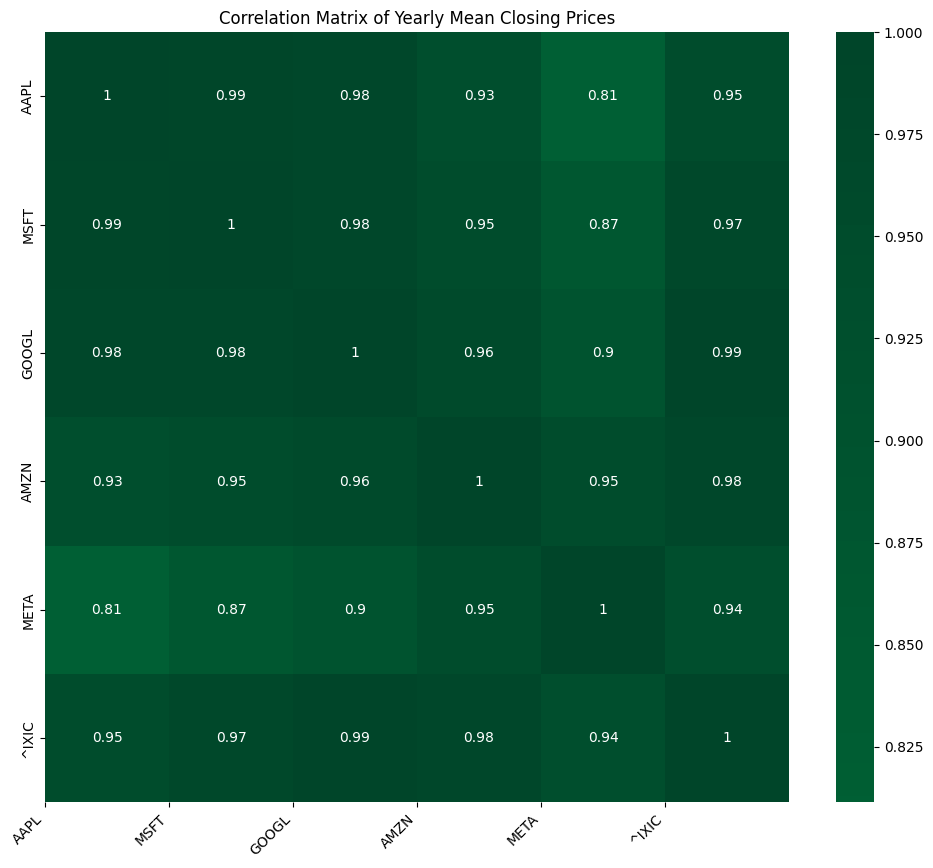

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assume you have a dictionary 'dfs' containing DataFrames for each ticker

# Create a grid layout for subplots
num_rows = 2
num_cols = 3

# Iterate through the dictionary and plot line charts with rolling mean in a grid
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.suptitle('Historical Yearly Closing Prices with Yearly Mean')

# Flatten the 2D array of subplots for easier iteration
axs = axs.flatten()

# List to store yearly means for each stock
yearly_mean_dict = {}

for i, (ticker, df) in enumerate(dfs.items()):
    # Resample the data to yearly frequency and calculate the mean
    yearly_mean = df['Close'].resample('Y').mean()

    axs[i].plot(yearly_mean.index, yearly_mean, label=f'{ticker} Yearly Mean', color='blue')

    axs[i].set_title(f'{ticker} Yearly Closing Prices with Yearly Mean')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Yearly Mean Closing Price')
    axs[i].legend()
    axs[i].grid(True)

    # Append yearly mean to the list
    yearly_mean_dict[ticker] = yearly_mean

# Remove any empty subplots if the number of stocks is less than the total number of subplots
for j in range(len(dfs), num_rows * num_cols):
    fig.delaxes(axs[j])

# Combine the yearly means into a single DataFrame
correlation_df = pd.concat(yearly_mean_dict, axis=1)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix with ticker names and values using Seaborn
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix of Yearly Mean Closing Prices')

# Specify the color map and center the colormap at 0 for better visualization
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='YlGn', center=0)

# Add tickers on top of the heatmap
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [ ]:
dfs

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 1985-01-01    0.130022    0.138951    0.124442    0.129464    0.100182   
 1985-02-01    0.129464    0.137277    0.110491    0.110491    0.085501   
 1985-03-01    0.110491    0.116071    0.092634    0.098772    0.076432   
 1985-04-01    0.098772    0.102679    0.087612    0.094866    0.073410   
 1985-05-01    0.094866    0.099330    0.075335    0.077567    0.060023   
 ...                ...         ...         ...         ...         ...   
 2023-07-01  193.779999  198.229996  186.600006  196.449997  195.926956   
 2023-08-01  196.240005  196.729996  171.960007  187.869995  187.369781   
 2023-09-01  189.490005  189.979996  167.619995  171.210007  170.984741   
 2023-10-01  171.220001  182.339996  165.669998  170.770004  170.545319   
 2023-11-01  171.000000  190.960007  170.119995  189.690002  189.690002   
 
               

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Assuming dfs is a dictionary with stock tickers as keys and DataFrames as values

# Iterate through the dictionary and perform ADF test for each stock
for i, (ticker, df_stock) in enumerate(dfs.items()):
    # Assuming 'Close' is the column containing closing prices
    closing_prices = df_stock['Close']

    # Perform ADF test
    result = adfuller(closing_prices)

    # Print results
    print(f"\nADF Test Results for {ticker} (Index {i}):")
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    if result[1] <= 0.05:
        print("Reject the null hypothesis. The time series is likely stationary.")
    else:
        print("Fail to reject the null hypothesis. The time series may not be stationary.")



ADF Test Results for AAPL (Index 0):
ADF Statistic: 2.141490537447876
p-value: 0.9988308069174465
Critical Values: {'1%': -3.444965543297668, '5%': -2.8679842369272976, '10%': -2.5702025382716047}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for MSFT (Index 1):
ADF Statistic: 2.451817440504781
p-value: 0.9990326455881504
Critical Values: {'1%': -3.445542818501549, '5%': -2.868238133603207, '10%': -2.5703378690483176}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for GOOGL (Index 2):
ADF Statistic: 1.2224880514074787
p-value: 0.9961376305201118
Critical Values: {'1%': -3.4609922013325267, '5%': -2.875015740963014, '10%': -2.5739524288408777}
Fail to reject the null hypothesis. The time series may not be stationary.

ADF Test Results for AMZN (Index 3):
ADF Statistic: 0.11593516507909414
p-value: 0.9671323713882345
Critical Values: {'1%': -3.4521902441030963, '5%': -2.871158406898617, '10%': -

In [ ]:
dfs.keys()

dict_keys(['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', '^IXIC'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


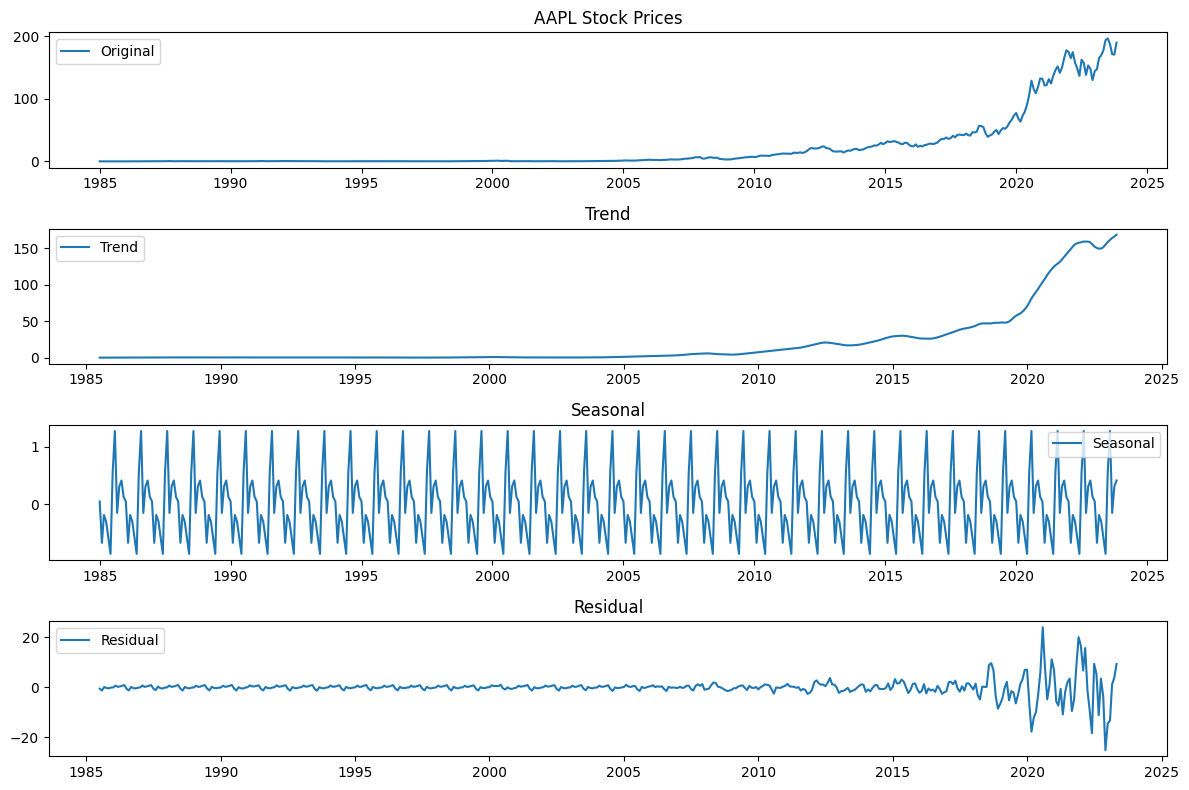


ARIMA Model Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  373
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -337.268
Date:                Sun, 19 Nov 2023   AIC                            690.535
Time:                        21:19:26   BIC                            721.887
Sample:                    01-01-1985   HQIC                           702.986
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2341      0.028     -8.236      0.000      -0.290      -0.178
ar.L2         -0.9261      0.027    -33.705      0.000      -0.980      -0.872
ar.L3          0.3800

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


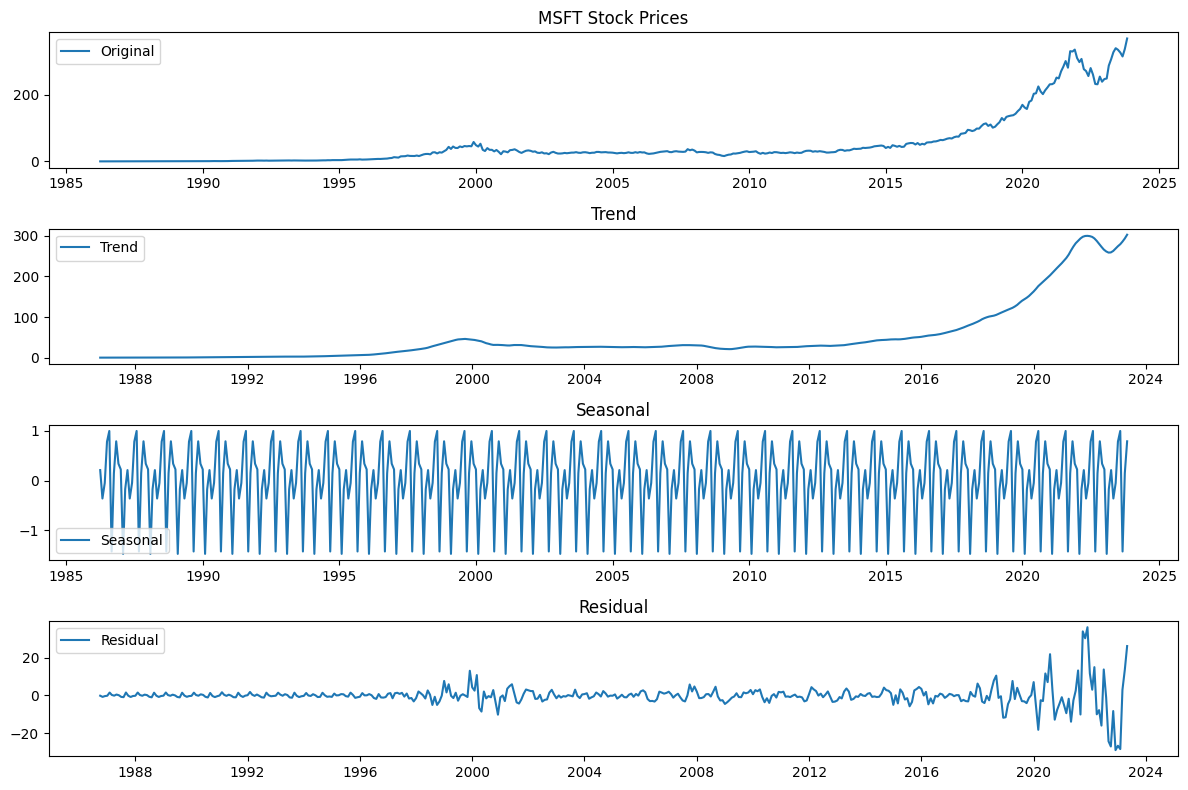


ARIMA Model Summary for MSFT:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  361
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -821.047
Date:                Sun, 19 Nov 2023   AIC                           1658.095
Time:                        21:19:29   BIC                           1689.184
Sample:                    04-01-1986   HQIC                          1670.456
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7686      0.487     -1.579      0.114      -1.723       0.186
ar.L2          0.0224      0.450      0.050      0.960      -0.859       0.904
ar.L3          0.1583

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

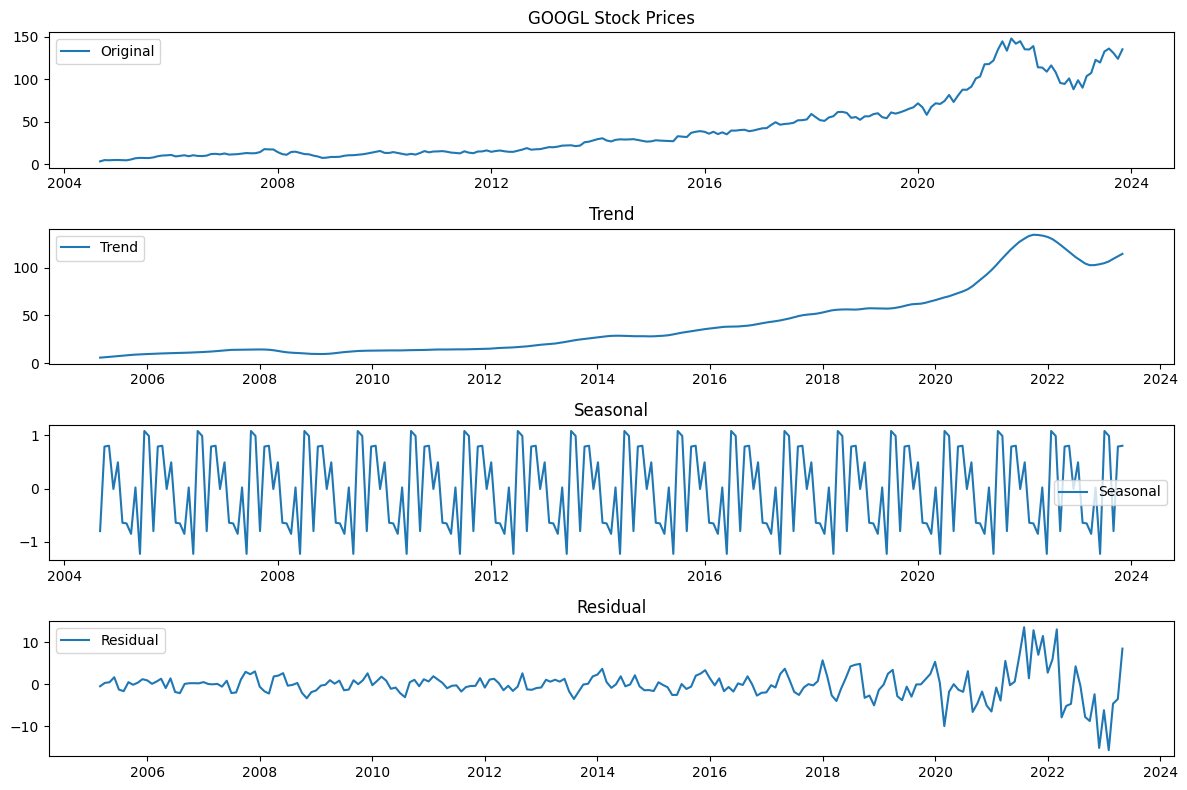


ARIMA Model Summary for GOOGL:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  184
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -368.441
Date:                Sun, 19 Nov 2023   AIC                            752.881
Time:                        21:19:32   BIC                            778.557
Sample:                    09-01-2004   HQIC                           763.289
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1269      1.308     -0.097      0.923      -2.691       2.437
ar.L2         -0.1920      1.261     -0.152      0.879      -2.663       2.279
ar.L3         -0.094

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

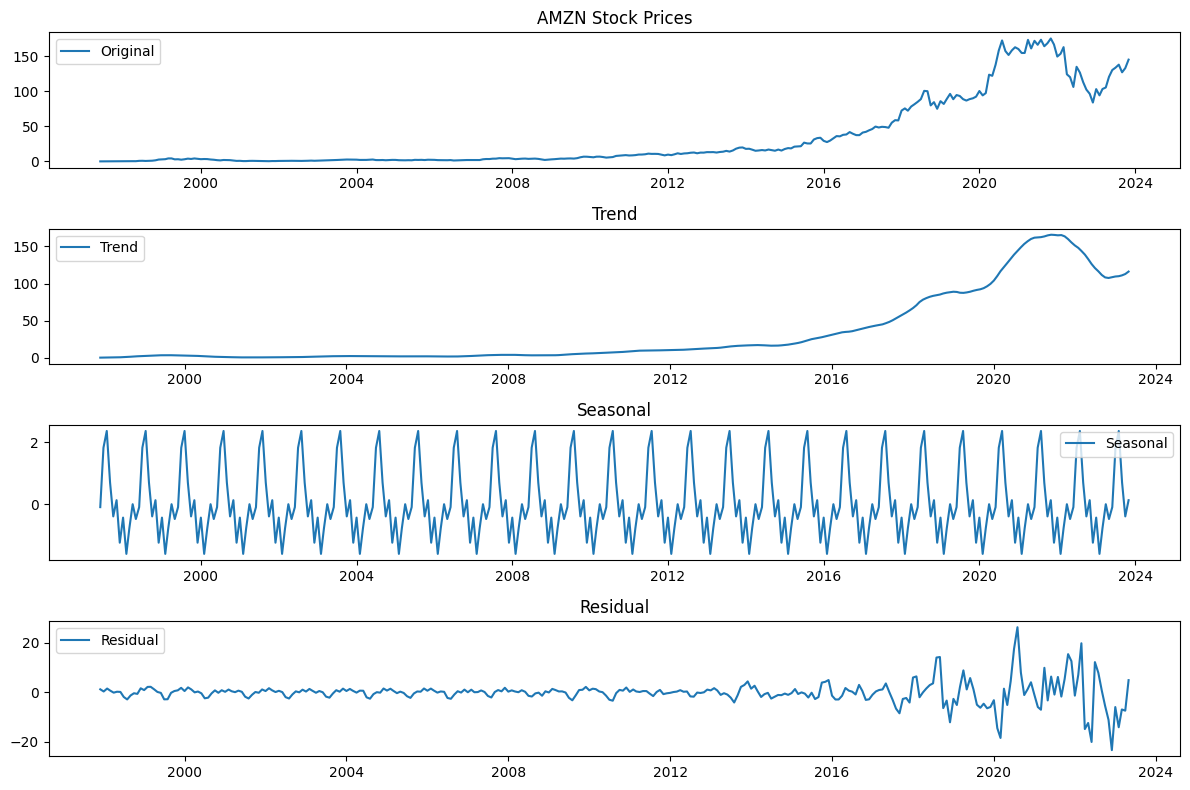


ARIMA Model Summary for AMZN:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  254
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -434.507
Date:                Sun, 19 Nov 2023   AIC                            885.015
Time:                        21:19:37   BIC                            913.282
Sample:                    06-01-1997   HQIC                           896.388
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7966      0.206      3.860      0.000       0.392       1.201
ar.L2         -0.0819      0.206     -0.399      0.690      -0.485       0.321
ar.L3          0.3928

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

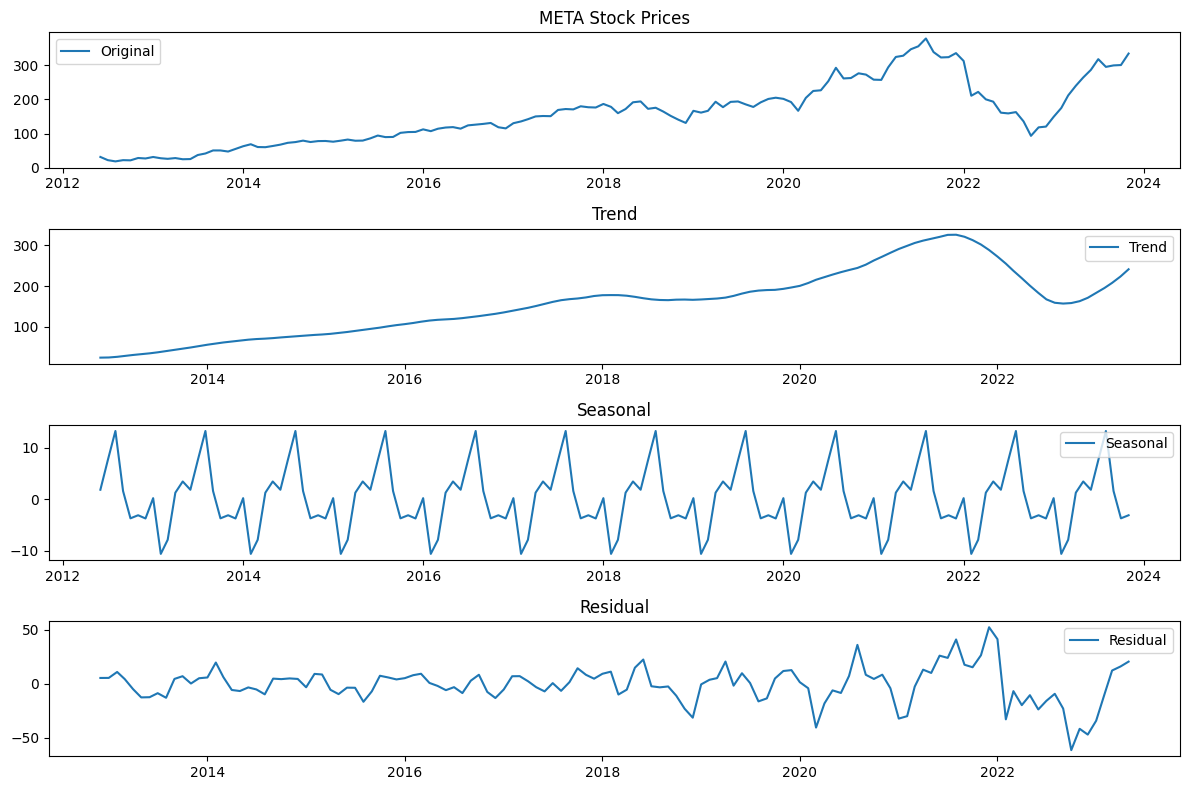


ARIMA Model Summary for META:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  110
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -417.945
Date:                Sun, 19 Nov 2023   AIC                            851.890
Time:                        21:19:41   BIC                            873.421
Sample:                    06-01-2012   HQIC                           860.621
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2851      0.102     12.606      0.000       1.085       1.485
ar.L2         -1.1562      0.170     -6.806      0.000      -1.489      -0.823
ar.L3          0.5263

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Us

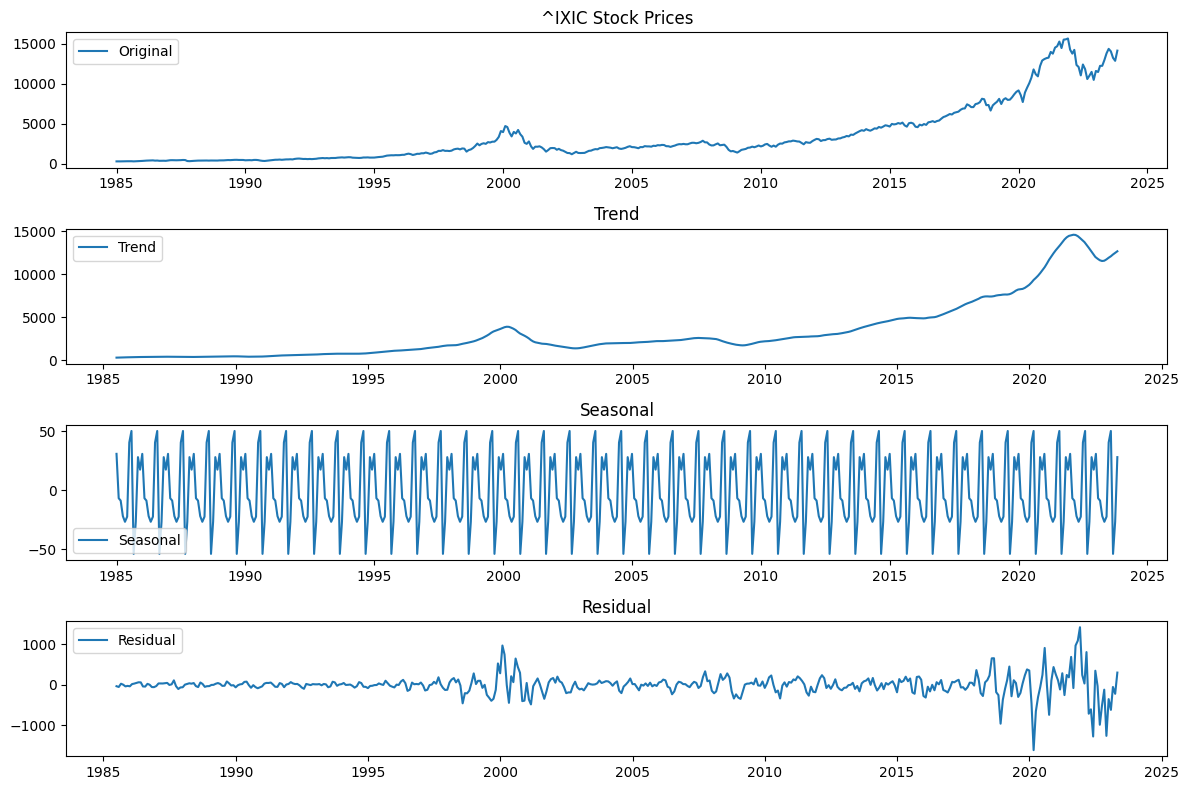


ARIMA Model Summary for ^IXIC:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  373
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -2384.483
Date:                Sun, 19 Nov 2023   AIC                           4784.965
Time:                        21:19:44   BIC                           4816.316
Sample:                    01-01-1985   HQIC                          4797.416
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0285      0.307      0.093      0.926      -0.573       0.630
ar.L2          0.6318      0.191      3.306      0.001       0.257       1.006
ar.L3         -0.044

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming dfs is a dictionary with stock tickers as keys and DataFrames as values

# Function to build and forecast ARIMA model for a given stock
def build_arima_model(df_stock, ticker):
    # Assuming 'Close' is the column containing closing prices
    closing_prices = df_stock['Close']

    # Split the data into training and testing sets
    train_size = int(len(closing_prices) * 0.8)
    train, test = closing_prices[:train_size], closing_prices[train_size:]

    # Build ARIMA model
    model = ARIMA(train, order=(5, 1, 2))  # Example order, you may need to tune this
    model_fit = model.fit()

    # Decompose time series into components
    decomposition = seasonal_decompose(closing_prices, model='additive', period=12)  # Adjust the period accordingly

    # Plot results
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(closing_prices.index, closing_prices, label='Original')
    plt.legend()
    plt.title(f'{ticker} Stock Prices')

    plt.subplot(4, 1, 2)
    plt.plot(decomposition.trend.index, decomposition.trend, label='Trend')
    plt.legend()
    plt.title('Trend')

    plt.subplot(4, 1, 3)
    plt.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
    plt.legend()
    plt.title('Seasonal')

    plt.subplot(4, 1, 4)
    plt.plot(decomposition.resid.index, decomposition.resid, label='Residual')
    plt.legend()
    plt.title('Residual')

    plt.tight_layout()
    plt.show()

    # Return decomposition and model summary
    return decomposition, model_fit.summary()

# Iterate through the dictionary and build ARIMA model for each stock
for ticker, df_stock in dfs.items():
    decomposition, model_summary = build_arima_model(df_stock, ticker)

    # Print model summary
    print(f"\nARIMA Model Summary for {ticker}:")
    print(model_summary)


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.4 MB/s eta 0:00:00


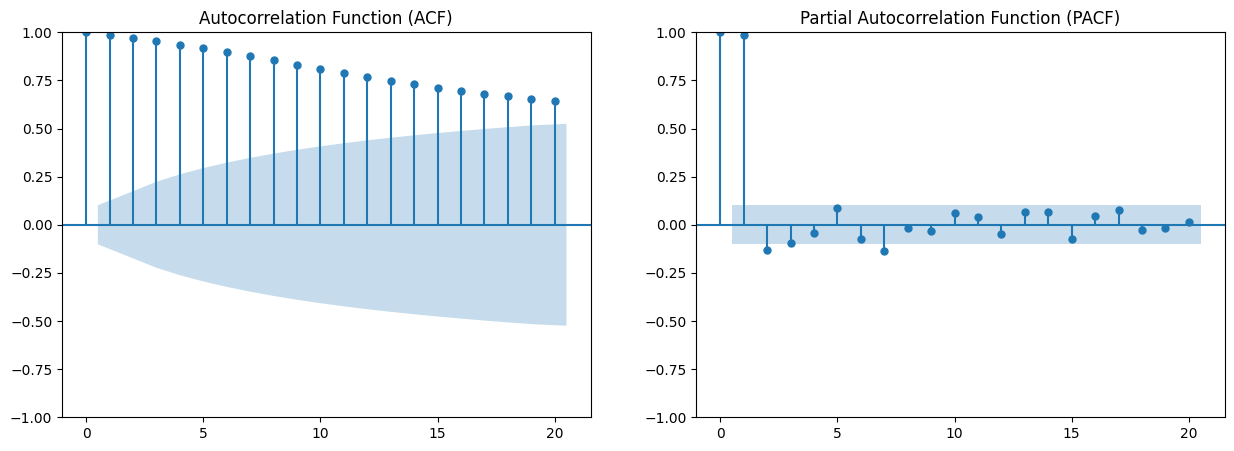

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


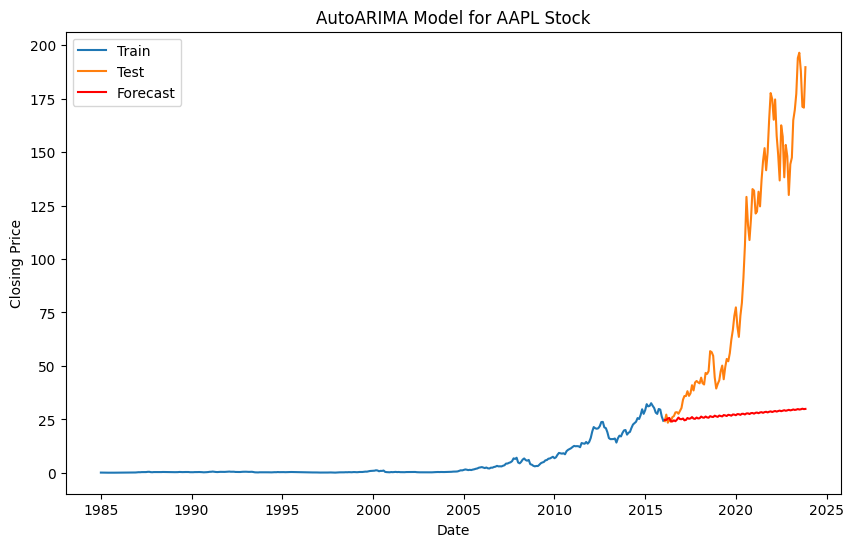


AutoARIMA Model Summary for AAPL:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  373
Model:               SARIMAX(4, 1, 5)   Log Likelihood                -327.828
Date:                Sun, 19 Nov 2023   AIC                            677.655
Time:                        21:20:50   BIC                            720.763
Sample:                    01-01-1985   HQIC                           694.775
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1042      0.076      1.368      0.171      -0.045       0.254
ar.L1          0.2968      0.038      7.784      0.000       0.222       0.372
ar.L2         -0.

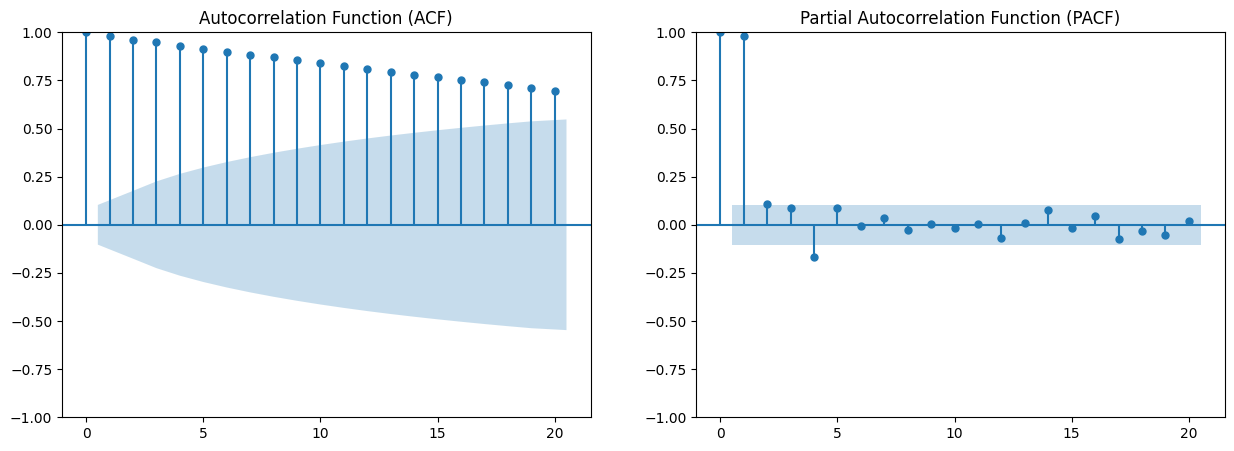

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


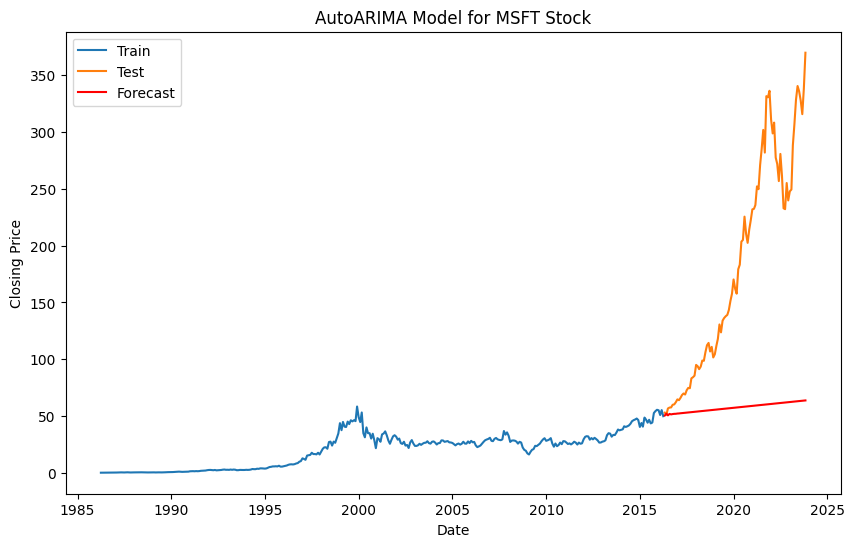


AutoARIMA Model Summary for MSFT:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  361
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -821.754
Date:                Sun, 19 Nov 2023   AIC                           1653.507
Time:                        21:20:58   BIC                           1672.938
Sample:                    04-01-1986   HQIC                          1661.233
                         - 04-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3319      0.227      1.461      0.144      -0.113       0.777
ar.L1         -1.0006      0.060    -16.615      0.000      -1.119      -0.883
ar.L2         -0.

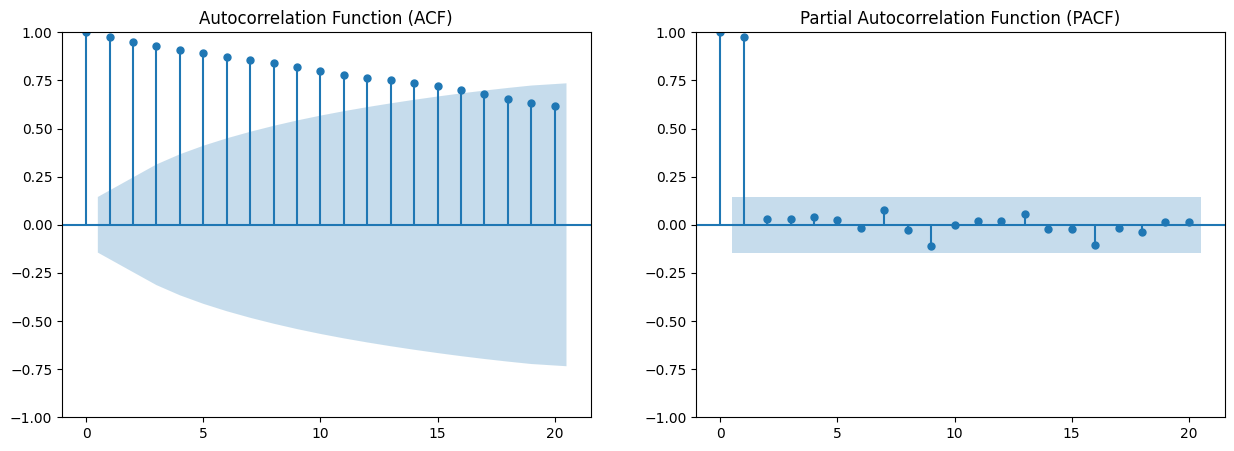

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optim

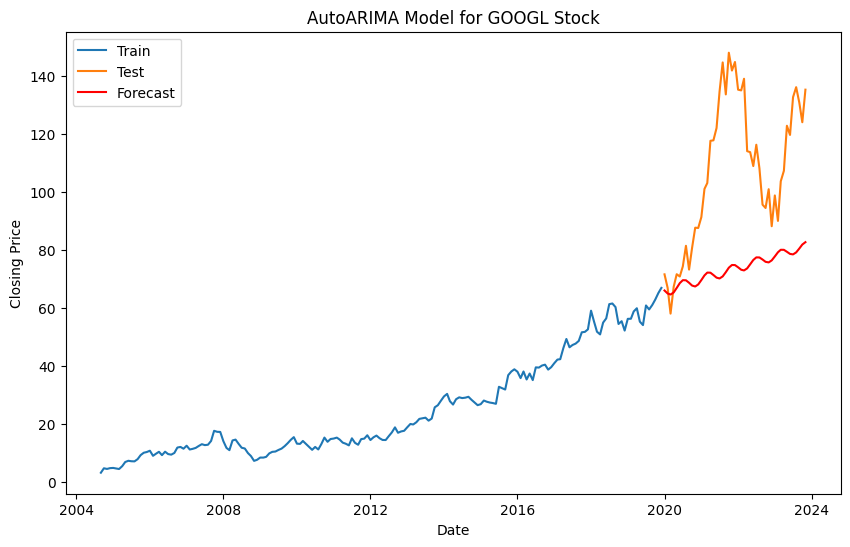


AutoARIMA Model Summary for GOOGL:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  184
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -358.126
Date:                Sun, 19 Nov 2023   AIC                            728.252
Time:                        21:21:07   BIC                            747.509
Sample:                    09-01-2004   HQIC                           736.058
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1967      0.077      2.551      0.011       0.046       0.348
ar.L1          1.4044      0.018     78.553      0.000       1.369       1.439
ar.L2         -0

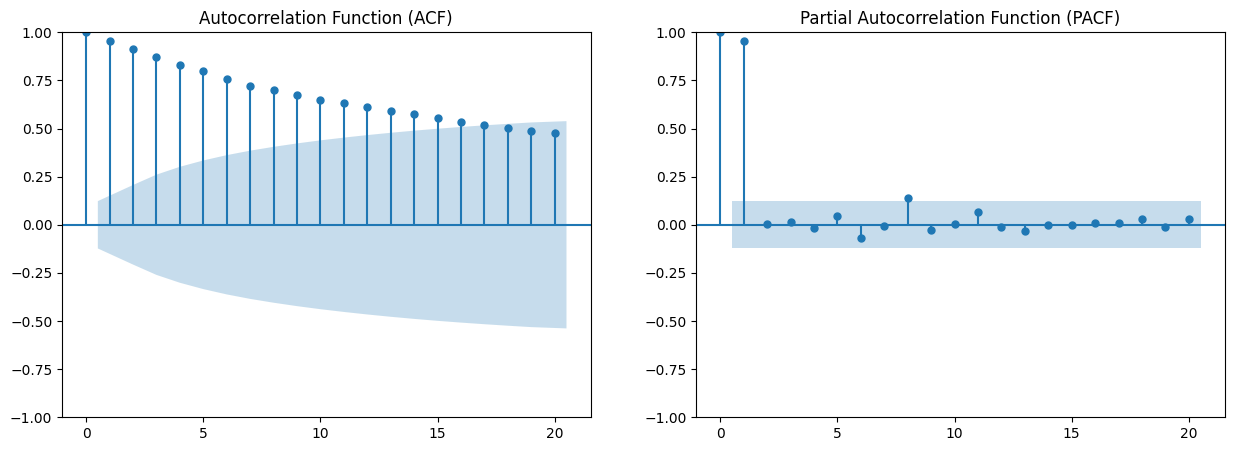

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


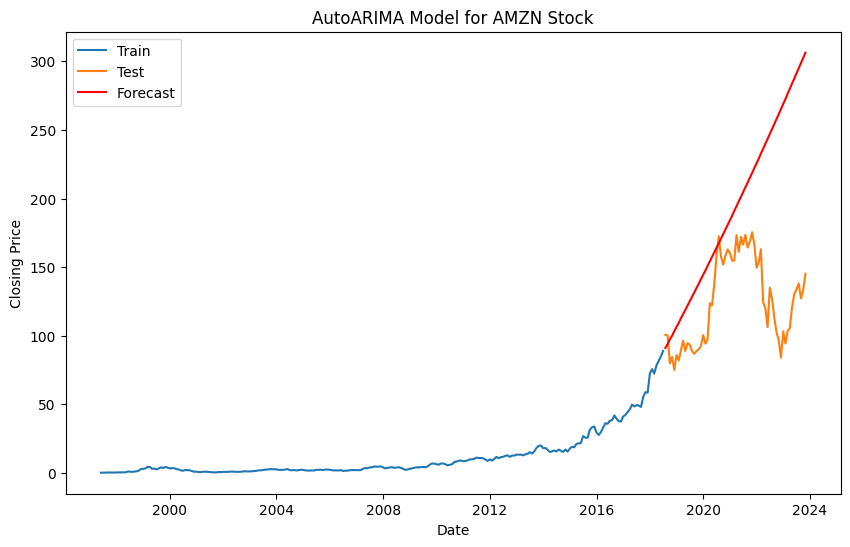


AutoARIMA Model Summary for AMZN:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  254
Model:               SARIMAX(4, 2, 1)   Log Likelihood                -431.871
Date:                Sun, 19 Nov 2023   AIC                            877.743
Time:                        21:21:15   BIC                            902.449
Sample:                    06-01-1997   HQIC                           887.684
                         - 07-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0170      0.016      1.071      0.284      -0.014       0.048
ar.L1         -0.0428      0.067     -0.642      0.521      -0.173       0.088
ar.L2         -0.

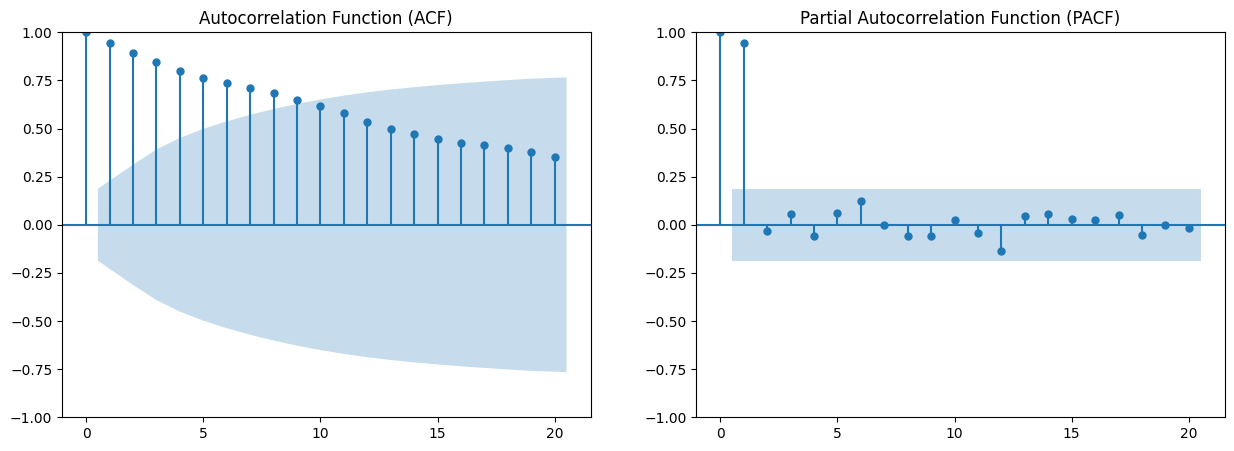

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


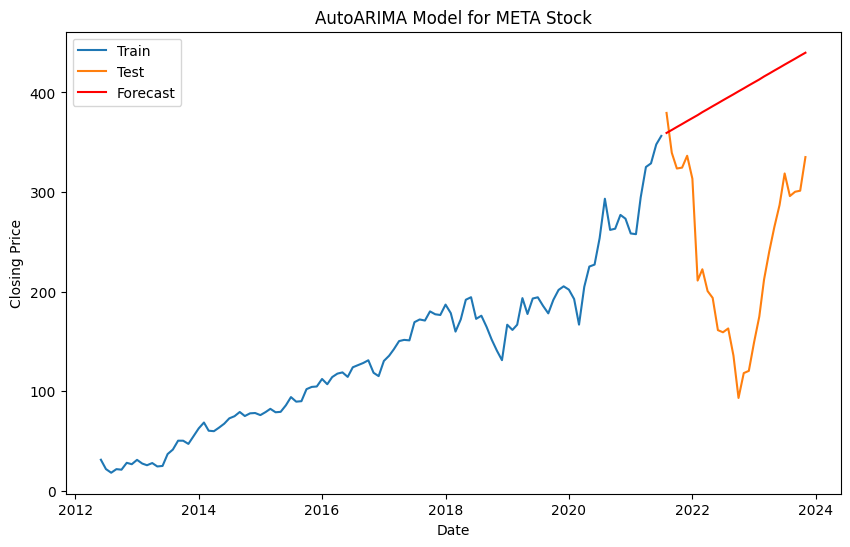


AutoARIMA Model Summary for META:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -424.688
Date:                Sun, 19 Nov 2023   AIC                            853.375
Time:                        21:21:17   BIC                            858.758
Sample:                    06-01-2012   HQIC                           855.558
                         - 07-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9835      1.198      2.491      0.013       0.636       5.331
sigma2       141.8195     14.586      9.723      0.000     113.231     170.408
Ljung-Box (L1) (Q

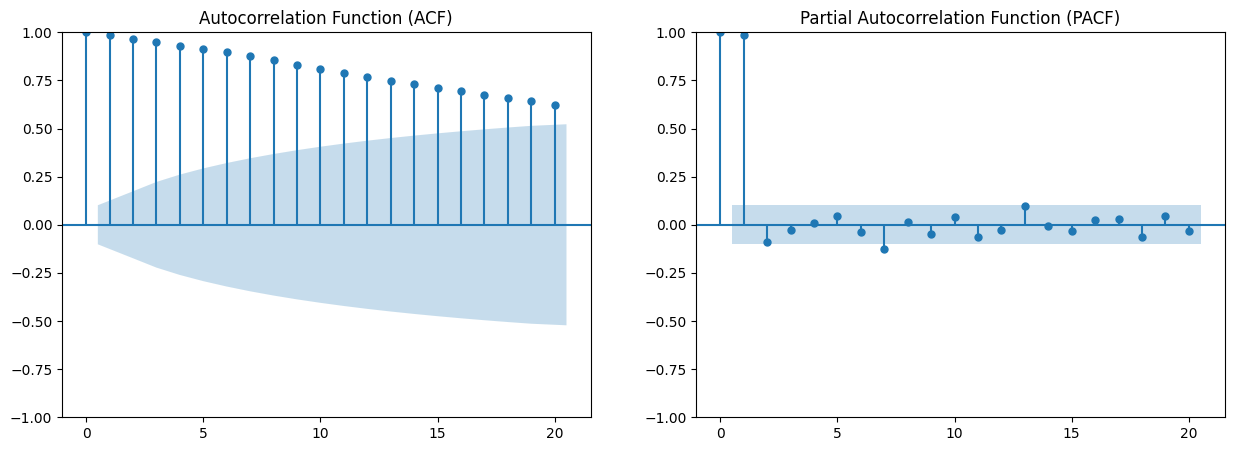

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


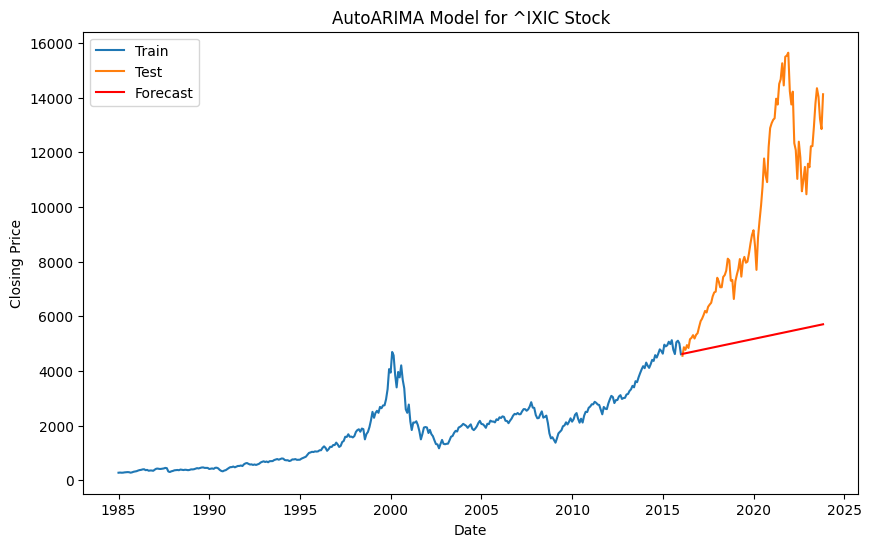


AutoARIMA Model Summary for ^IXIC:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  373
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -2385.610
Date:                Sun, 19 Nov 2023   AIC                           4775.220
Time:                        21:21:19   BIC                           4783.058
Sample:                    01-01-1985   HQIC                          4778.332
                         - 01-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.6539      7.705      1.513      0.130      -3.448      26.756
sigma2      2.176e+04    718.269     30.300      0.000    2.04e+04    2.32e+04
Ljung-Box (L1) (

In [ ]:
import pandas as pd
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming dfs is a dictionary with stock tickers as keys and DataFrames as values

# Function to build and forecast ARIMA model for a given stock
def build_auto_arima_model(df_stock, ticker):
    # Assuming 'Close' is the column containing closing prices
    closing_prices = df_stock['Close']

    # Split the data into training and testing sets
    train_size = int(len(closing_prices) * 0.8)
    train, test = closing_prices[:train_size], closing_prices[train_size:]

    # Plot ACF and PACF
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plot_acf(train, lags=20, ax=plt.gca())
    plt.title('Autocorrelation Function (ACF)')

    plt.subplot(1, 2, 2)
    plot_pacf(train, lags=20, ax=plt.gca())
    plt.title('Partial Autocorrelation Function (PACF)')

    plt.show()

    # Use auto ARIMA to determine the best (p, d, q) parameters
    auto_model = pm.auto_arima(train, seasonal=False, suppress_warnings=True)

    # Build ARIMA model with the selected parameters
    model = pm.ARIMA(order=auto_model.order)
    model_fit = model.fit(train)

    # Forecast
    forecast = model_fit.predict(len(test), return_conf_int=False)

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.title(f'AutoARIMA Model for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    # Return forecast and model summary
    return forecast, model_fit.summary()

# Iterate through the dictionary and build AutoARIMA model for each stock
for ticker, df_stock in dfs.items():
    forecast, model_summary = build_auto_arima_model(df_stock, ticker)

    # Print model summary
    print(f"\nAutoARIMA Model Summary for {ticker}:")
    print(model_summary)


In [ ]:
# List to store ticker names
ticker_names = []

for i, (ticker, df) in enumerate(dfs.items()):
    # ... (previous code remains the same)

    # Append ticker name to the list
    ticker_names.append(ticker)

# Print all ticker names
print("All Ticker Names:")
for ticker_name in ticker_names:
    print(ticker_name)

All Ticker Names:
AAPL
MSFT
GOOGL
AMZN
META
^IXIC


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd


def scrape_stock_news(ticker):
    news_link = f'https://news.google.com/search?for={ticker}+stock&hl=en-US&gl=US&ceid=US%3Aen'

    # Set up Chrome options
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    # Create a webdriver instance
    driver = webdriver.Chrome(options=chrome_options)

    # Load the search results link
    driver.get(news_link)

    # Wait for the content to load (adjust the sleep duration if needed)
    driver.implicitly_wait(5)  # Waits for up to 5 seconds

    # Extract news headlines and links
    headlines_and_links = []
    headline_elements = driver.find_elements(By.XPATH, "//h3[@class='ipQwMb ekueJc RD0gLb']")

    for headline_element in headline_elements:
        headline_text = headline_element.text
        article_link = headline_element.find_element(By.XPATH, "./..").get_attribute("href")
        headlines_and_links.append(headline_text)

    # Close the browser
    driver.quit()
    return headlines_and_links

# Create a final dictionary to store news for each ticker
final_news_dict = {}

# Iterate through the dictionary and build ARIMA model for each stock
for ticker, df_stock in dfs.items():
    # Convert ticker to lowercase
    lowercase_ticker = ticker.lower()

    # Get news for the individual ticker
    news_content = scrape_stock_news(lowercase_ticker)

    # Append news to the final dictionary
    final_news_dict[lowercase_ticker] = news_content

# Print the final news dictionary
for ticker, news_list in final_news_dict.items():
    print(ticker,news_list)


aapl ['Where Will Apple Stock Be in 3 Years?', '2023 Winners: 7 Stocks That Will Continue to Dominate in 2024', 'With 55% ownership in Apple Inc. (NASDAQ:AAPL), institutional investors have a lot riding on the business', 'ChatGPT predicts Apple stock price for start of 2024', "2 Soaring Stocks I'd Buy Now With No Hesitation", '3 Large-Cap Tech Stocks to Toss Now', "Apple Stock Falls Again. What's Behind the Losing Streak.", 'Apple stock dips after weak outlook for December quarter revenue', '3 Reasons to Buy AAPL Stock Even After Its Fourth Consecutive ...', "AAPL Stock: Is the Magic Gone? Here's How You Can Still Profit", 'Up 45% Since The Beginning Of 2023, Where Is Apple Stock Headed?', 'AAPL: Analyzing Apple (AAPL) Stock Before Earnings', "Apple Stock Earnings Are Coming, Here's An Option Trade To Profit", 'Apple (NASDAQ:AAPL) Stock: An Under-the-Radar AI Play', 'Here is What to Know Beyond Why Apple Inc. (AAPL) is a Trending Stock', 'Why Is Apple (AAPL) Stock Down Today?', 'Guru F

In [ ]:
!pip install transformers

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")

# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

finbert = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone',num_labels=3)
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')




config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
import numpy as np
labels = {0:'neutral', 1:'positive',2:'negative'}

x="Apple stock news is okayish"

inputs = tokenizer(x, return_tensors="pt")
outputs = finbert(**inputs)[0]

val = labels[np.argmax(outputs.detach().numpy())]

In [ ]:
val

'positive'

In [ ]:
setimentDict={}
for ticker, news_list in final_news_dict.items():
    predList=[]
    for news in news_list:
      newsInp=news
      inputs = tokenizer(x, return_tensors="pt")
      outputs = finbert(**inputs)[0]
      val = labels[np.argmax(outputs.detach().numpy())]
      predList.append(val)
    setimentDict[ticker]=predList

In [ ]:
set(setimentDict['aapl'])

{'positive'}

Epoch 1/5
12/12 [==============================] - 11s 8ms/step - loss: 0.0017
Epoch 2/5
12/12 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 3/5
12/12 [==============================] - 0s 7ms/step - loss: 3.2627e-04
Epoch 4/5
12/12 [==============================] - 0s 8ms/step - loss: 1.1866e-04
Epoch 5/5
3/3 [==============================] - 0s 5ms/step


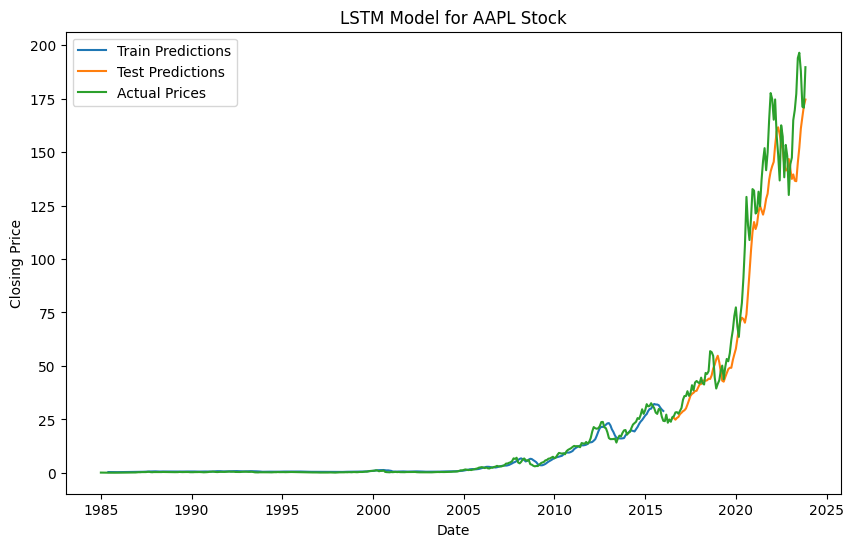

Epoch 1/5
12/12 [==============================] - 5s 9ms/step - loss: 0.0020
Epoch 2/5
12/12 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 3/5
12/12 [==============================] - 0s 9ms/step - loss: 5.3964e-04
Epoch 4/5
12/12 [==============================] - 0s 8ms/step - loss: 1.4885e-04
Epoch 5/5
3/3 [==============================] - 0s 7ms/step


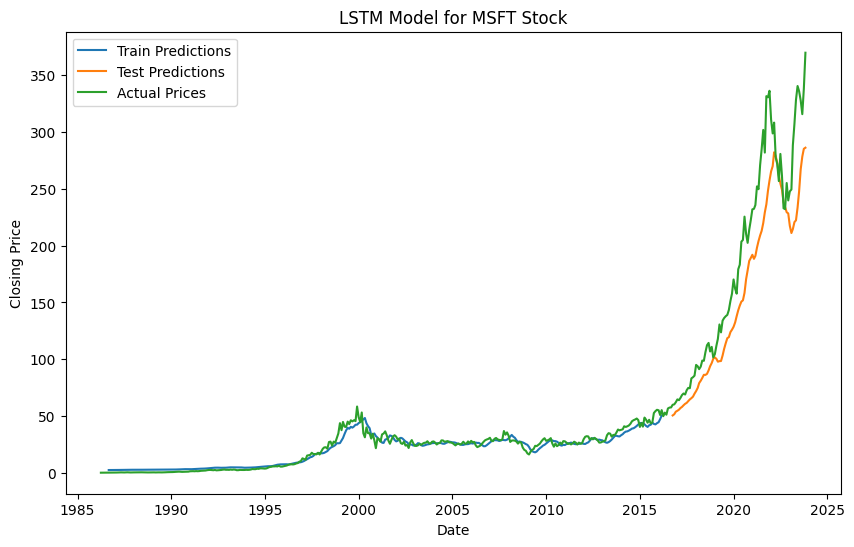

Epoch 1/5
6/6 [==============================] - 5s 12ms/step - loss: 0.0269
Epoch 2/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0108
Epoch 3/5
6/6 [==============================] - 0s 10ms/step - loss: 0.0095
Epoch 4/5
6/6 [==============================] - 0s 9ms/step - loss: 0.0063
Epoch 5/5
2/2 [==============================] - 0s 12ms/step


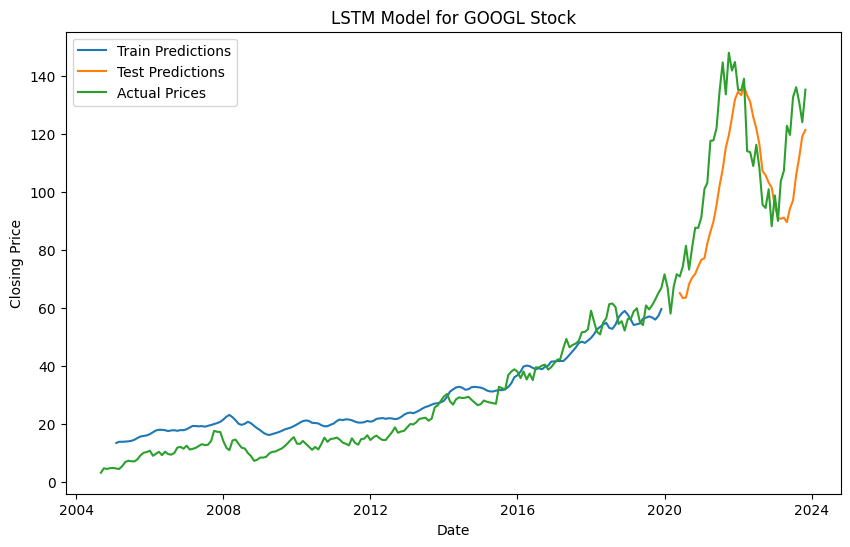

Epoch 1/5
8/8 [==============================] - 6s 14ms/step - loss: 0.0102
Epoch 2/5
8/8 [==============================] - 0s 11ms/step - loss: 0.0071
Epoch 3/5
8/8 [==============================] - 0s 12ms/step - loss: 0.0039
Epoch 4/5
8/8 [==============================] - 0s 11ms/step - loss: 4.9165e-04
Epoch 5/5
2/2 [==============================] - 0s 7ms/step


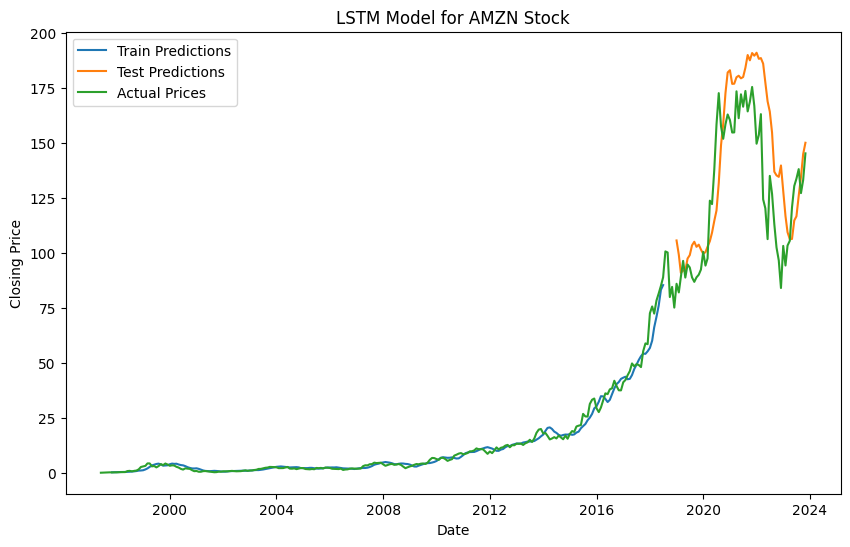

Epoch 1/5
4/4 [==============================] - 6s 14ms/step - loss: 0.1443
Epoch 2/5
4/4 [==============================] - 0s 15ms/step - loss: 0.0898
Epoch 3/5
4/4 [==============================] - 0s 10ms/step - loss: 0.0346
Epoch 4/5
4/4 [==============================] - 0s 10ms/step - loss: 0.0288
Epoch 5/5
1/1 [==============================] - 0s 20ms/step


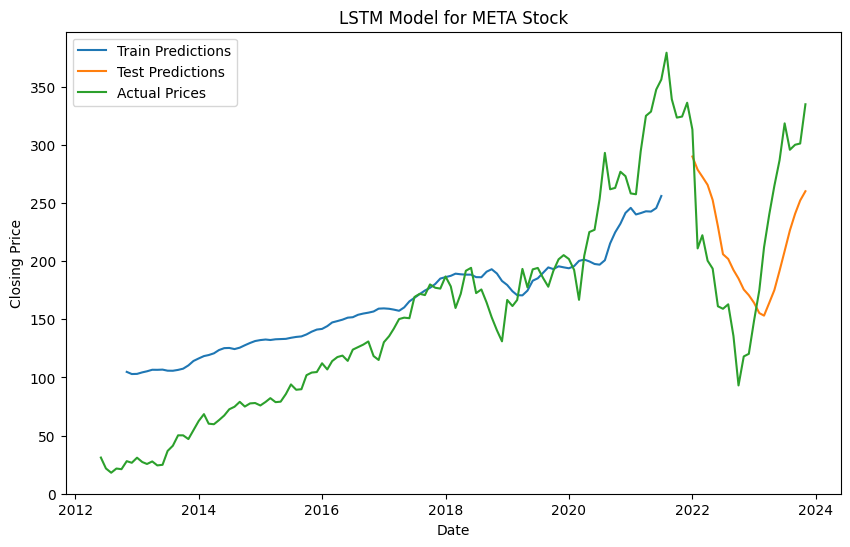

Epoch 1/5
12/12 [==============================] - 6s 9ms/step - loss: 0.0095
Epoch 2/5
12/12 [==============================] - 0s 9ms/step - loss: 0.0044
Epoch 3/5
12/12 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 4/5
12/12 [==============================] - 0s 8ms/step - loss: 5.4332e-04
Epoch 5/5
3/3 [==============================] - 0s 9ms/step


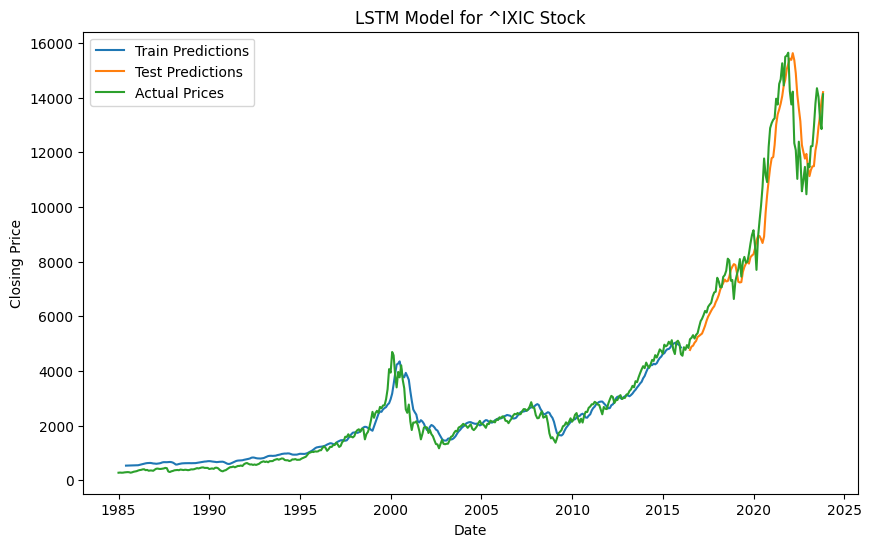

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming dfs is a dictionary with stock tickers as keys and DataFrames as values

# Function to build and forecast LSTM model for a given stock
def build_lstm_model(df_stock, ticker):
    # Assuming 'Close' is the column containing closing prices
    closing_prices = df_stock['Close'].values.reshape(-1, 1)

    # Normalize the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    closing_prices_scaled = scaler.fit_transform(closing_prices)

    # Split the data into training and testing sets
    train_size = int(len(closing_prices_scaled) * 0.8)
    train, test = closing_prices_scaled[:train_size], closing_prices_scaled[train_size:]

    # Prepare data for LSTM
    def create_dataset(dataset, time_steps=1):
        dataX, dataY = [], []
        for i in range(len(dataset) - time_steps):
            a = dataset[i:(i + time_steps), 0]
            dataX.append(a)
            dataY.append(dataset[i + time_steps, 0])
        return np.array(dataX), np.array(dataY)

    time_steps = 5  # You can adjust this based on your preference
    X_train, y_train = create_dataset(train, time_steps)
    X_test, y_test = create_dataset(test, time_steps)

    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(units=60, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    model.add(LSTM(units=60, return_sequences=True))
    model.add(LSTM(units=60))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32)

    # Make predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inverse transform to get original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    # # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(df_stock.index[time_steps:len(train_predict) + time_steps], train_predict, label='Train Predictions')
    plt.plot(df_stock.index[train_size + time_steps:len(df_stock)+1], test_predict, label='Test Predictions')
    plt.plot(df_stock.index, df_stock['Close'], label='Actual Prices')
    plt.title(f'LSTM Model for {ticker} Stock')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()

    # Return predictions
    return train_predict, test_predict

# Iterate through the dictionary and build LSTM model for each stock
for ticker, df_stock in dfs.items():
    train_predictions, test_predictions = build_lstm_model(df_stock, ticker)
